#### _Group #36 Project Proposal_
# Heart Disease Dataset

In [11]:
# These packages need to be loaded

library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)

options(repr.matrix.max.rows = 6)
set.seed(1)

# _1) Introduction:_

1. Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
2. Clearly state the question you will try to answer with your project
3. Identify and describe the dataset that will be used to answer the question

* Heart disease is an increasingly prevalent and crippling disease accepting a multitude of different people across the globe. Given its severity, the ability to accurately diagnose the disease early is becoming increasingly important to ensure the longevity of these affected individuals. 

* Within our project we are looking to see if (variable columns of interest) can accurately predict the diagnosis of heart disease. The data set we will be using is a compiled data set consisting of different onset heart disease indicators with data from multiple different countries and spanning from 1988 onwards. The data was measured upon hospital admission for acute chest pain. This data set includes data on the age, sex, cheat pain type from 0-4, the resting blood pressure, serum cholestoral level in the blood, the fasting blood sugar, the resting electrocardiographic results, the maximum heart rate achieved, the presence of exercise induced angina, data about results of electrocartiogram tests including the ST depression value and the slope of the ST segment, (thal???), and the presence of heart disease in the patient. 


# _2) Preliminary exploratory data analysis:_

 1. Demonstrate that the dataset can be read from the web into R ✅ 
 2. Clean and wrangle your data into a tidy format ✅
 3. Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
 4. Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.


In [12]:
# Here I demonstrate that the data can be read into R
# I perform the as_factor() function on the target column because that is the column we are using for our question
# I also select the columns that we will use in our analysis as the predictors as all of them are not needed

heart_disease <- read_csv("heart.csv") %>%
    mutate(target = as_factor(target)) %>%
    select(age, trestbps, chol, fbs, thalach, thal, target)

head(heart_disease)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)



age,trestbps,chol,fbs,thalach,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
52,125,212,0,168,3,0
53,140,203,1,155,3,0
70,145,174,0,125,3,0
61,148,203,0,161,3,0
62,138,294,1,106,2,0
58,100,248,0,122,2,1



* (❗️) Our data is already in a tidy format because in each column there is one topic and each row has one observation


In [13]:
glimpse(heart_disease)

Rows: 1,025
Columns: 7
$ age      <dbl> 52, 53, 70, 61, 62, 58, 58, 55, 46, 54, 71, 43, 34, 51, 52, …
$ trestbps <dbl> 125, 140, 145, 148, 138, 100, 114, 160, 120, 122, 112, 132, …
$ chol     <dbl> 212, 203, 174, 203, 294, 248, 318, 289, 249, 286, 149, 341, …
$ fbs      <dbl> 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, …
$ thalach  <dbl> 168, 155, 125, 161, 106, 122, 140, 145, 144, 116, 125, 136, …
$ thal     <dbl> 3, 3, 3, 3, 2, 2, 1, 3, 3, 2, 2, 3, 2, 3, 0, 2, 2, 3, 2, 2, …
$ target   <fct> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, …


### Explore The Data
* Here, I summarized the data in one table (exploratory data analysis). An example I used is a table that reports the number of observations in each class, 

* (the means of the predictor variables you plan to use in your analysis and how many rows have missing data)

In [ ]:
obs <- nrow(heart_disease)
obs

* There are a total of 1025 observations in this dataset

In [ ]:
heart_disease_obs <- heart_disease %>%
    group_by(target) %>%
    summarize(count = n(), percentage = n()/obs * 100)

heart_disease_obs

* This illustrates that in this data set, 48% do not have a heart disease, and 51 % do have a heart disease

### Visualize the Data

Using only training data, visualize the data with one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example I used is one that compares the distributions of each of the predictor variables we plan to use in our analysis.

In [ ]:
# I first Scale and Center the DATA here

scaled_heart_disease <- recipe(target  ~ ., data = heart_disease) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) %>%
    prep() %>%
    bake(heart_disease)

scaled_heart_disease

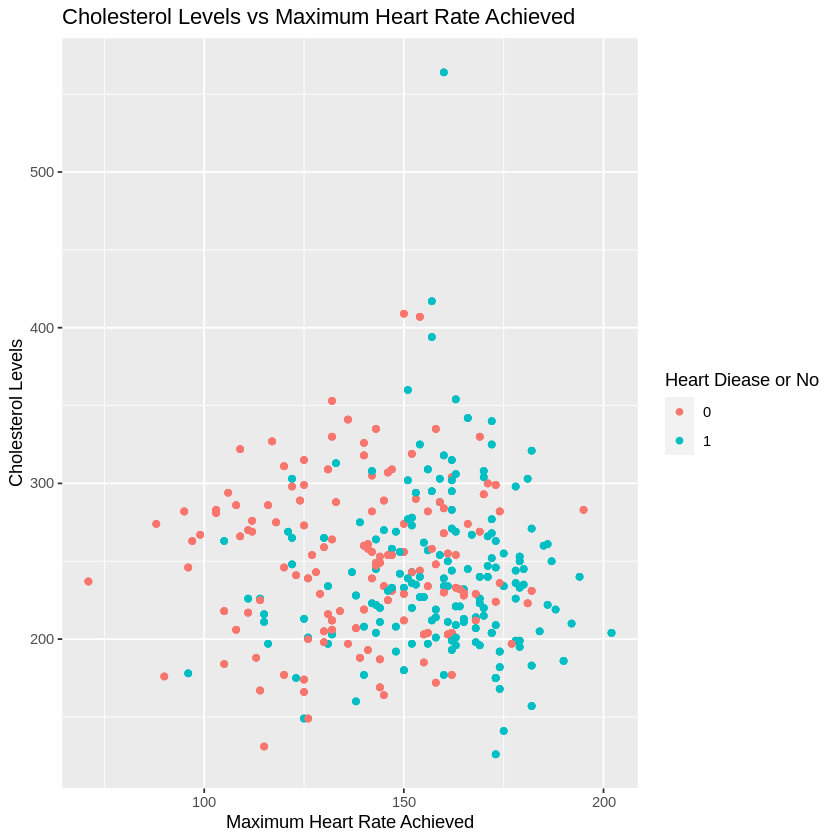

In [14]:
# Use this cell to visualize the dataset
# I plot a graph of cholesterol levels vs. maximum heart rate achieved

heart_disease_plot <- heart_disease %>%
    ggplot(aes(x = thalach, y =chol, color = target)) +
    geom_point() +
    labs(x = "Maximum Heart Rate Achieved", y = "Cholesterol Levels", color = "Heart Diease or No") +
    ggtitle("Cholesterol Levels vs Maximum Heart Rate Achieved")

heart_disease_plot

* This graph illustrates some relationship between the 2 predictors and if the individual has a heart disease

# _3) METHODS:_

1. Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?

## Data analysis steps:

1. Formulate a precise question that we want to answer:
    - Can age and maximum heart rate achieved can accurately predict the diagnosis of heart disease?
    
    
2. Loading the data: 
    - start by loading the tidyverrse package
    - Read the dataset using read_csv with no additional arguments, and then inspect its contents
    - Use function glimpse(dataset) to preview the data frame
    - Use function pull to extract a single column (target) and pass that into levels function to see the categories in the target column. 


3. Exploring the data
    - Use the group_by, summarize and n function to find the number and percentage of having heart disease(integer value = 1) or not (integer value = 0).
    - Draw a scatter plot to visualize the relationship between age and maximum heart rate achieved variables.
    - Based on the visualization, decide if these are useful variable for prediction
    -  Classification with K-nearest neighbors

4. Split the dataset into training data and testing data
    - Set the seed as set.seed(1)
    - Use the initial_split function to create the training and testing sets

5. Choose a K value
    - Load library tidymodels
    - Pick out our two desired predictor variables and class label and store them as a new data set
    - Create a model specification for K-nearest neighbors classification by calling the nearest_neighbor function.
    - Pass the model specification and the dataset to the fit function
    - Now we can use the predict function to predict our testing data.

### Reason to choose age and maximum heart rate achieved:

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)



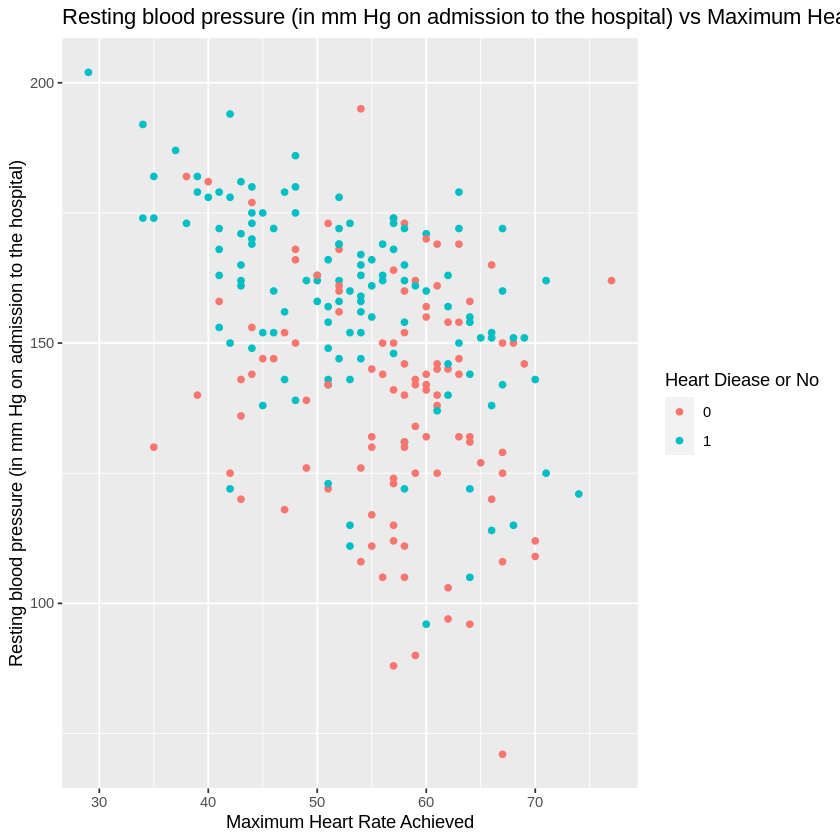

In [29]:
# TBD

data <- read_csv("heart.csv") %>%
    mutate(target = as_factor(target))

unique_data <- unique(data)

data_split <- initial_split(unique_data, prop = 0.75, strata = target)
data_train <- training(data_split)
data_test <- testing(data_split) 

heart_disease_var_check <- data_train %>%
    ggplot(aes(x = age, y=thalach, color = target)) +
    geom_point() +
    labs(x = "Maximum Heart Rate Achieved", y = "Resting blood pressure (in mm Hg on admission to the hospital)", color = "Heart Diease or No") +
    ggtitle("Resting blood pressure (in mm Hg on admission to the hospital) vs Maximum Heart Rate Achieved")

heart_disease_var_check

2. Describe at least one way that you will visualize the results


# _4) Expected outcomes and significance:_

1. What do you expect to find?
2. What impact could such findings have?
3. What future questions could this lead to?

- Our classification model aims to provide a reliable and automatic diagnosis for the presence of heart disease. We conduct a comprehensive analysis based on real data collection, a history of common symptoms and medical abnormality detection tests. Multiple predictions then are simultaneously and instantly generated by an automatic and technological-based model. This mechanism reduces potential human errors and time consumption in large data tracing and processing. Therefore, the classification model enhances the reliability, objectivity, and efficiency for heart disease screening.

- While this model aids the detection of present heart disease, the specific subtypes of patients’ heart disease remain undiagnosed. As there are several types of heat-related illness, future questions could advance the prediction and classification of these subtypes. For example, Coronary Artery Disease (CAD) is one of the most common heart diseases. Which further medical tests should be run and which predictors should be used in CAD diagnosis are the possible questions for data analysts and medical researchers to investigate on.
